# Chapter 3

**8.** This question involves the use of simple linear regression on the Auto
data set.

(a) Perform a simple linear regression with
mpg as the response and horsepower as the predictor. Print results



* Is there a relationship between the predictor and the response?






In [ ]:
import pandas as pd
url_auto="https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv"
df=pd.read_csv(url_auto) #Load it first

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


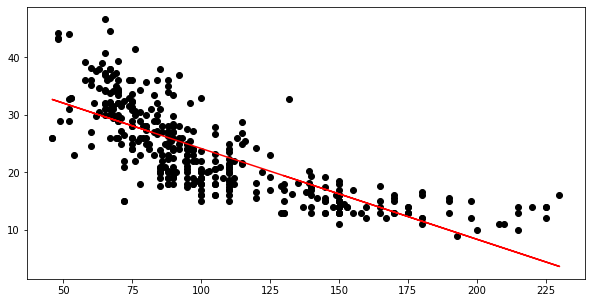

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


X=df[['horsepower']] #shape: n-samples -> (len(df['hosrsepower])), n-feature -> 1
y=df['mpg'] #shape: (n-samples,)

linear_r=LinearRegression()
linear_r.fit(X,y)

y_pred=linear_r.predict(X)

plt.figure(figsize=(10,5))
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='r'); #There is indeed a relationship

*   How strong is the relationship between the predictor and
the response?


*   Is the relationship between the predictor and the response positive or negative?



In [ ]:
from sklearn.metrics import r2_score
print(f"The R2 value is: {r2_score(y,y_pred)}. There is a negative relationship looking at the graph above")

The R2 value is: 0.6059482578894348. There is a negative relationship looking at the graph above


*   What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?





In [ ]:
import statsmodels.api as sm
import numpy as np

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
pred=model.get_prediction([[1,98]])
pred_sum=pred.summary_frame()

print(f"The associated value with a horsepower of 98 using sklearns regression result is: {round(linear_r.predict([[98]])[0])} \n")
print(f"Using statsmodel the predicted value is also: {round(pred_sum['mean'][0])}")
print(f"Corresponding confidence intervals are: {(pred_sum['mean_ci_lower'][0],pred_sum['mean_ci_upper'][0])}")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The associated value with a horsepower of 98 using sklearns regression result is: 24 

Using statsmodel the predicted value is also: 24
Corresponding confidence intervals are: (23.973078960703948, 24.961075344320914)


C) Produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit. 

**Note:** Implementing as much as possible using formulas and skipping libraries just for the sake of learning


*   **Fitted vs residuals:** Residuals points show a clear pattern which argues against linearity. Drawing a secound degree line through the data shows this pattern

**Formula for residuals:** error_term= observed value - predicted value

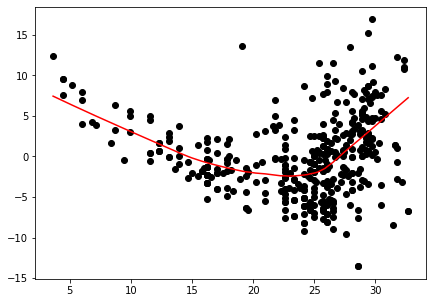

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals=y-y_pred
resid_line = lowess(residuals,y_pred)

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_pred, residuals,  color='black')
ax.plot(resid_line[:,0],resid_line[:,1],color = 'r');



*   **Normal Q-Q:** The points deviates little from the line, which shows that the data isnt normally distributed. Points at higher end of line have large residual magnitudes



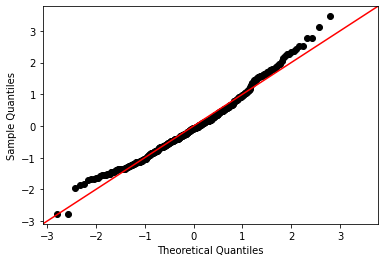

In [ ]:
fig = sm.qqplot(residuals,fit=True,line="45",color="black")
plt.show() 



*   **Scale-location:** Drawing a line doesnt show a pattern





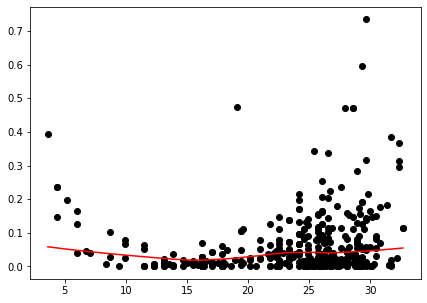

In [ ]:
rss=[np.sum(np.square(i)) for i in residuals] #Calculate residual sum of squares
rse=[i/(len(y_pred)-2) for i in rss] #Calculate residual standard error

rse_line = lowess(rse,y_pred)

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_pred, rse,  color='black')
ax.plot(rse_line[:,0],rse_line[:,1],color = 'r');



*   **Leverage:** There are outliers witch are inflence our whole result





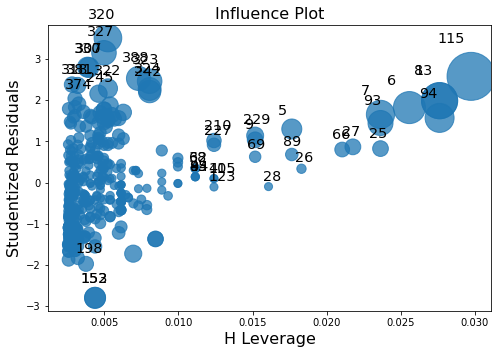

In [ ]:
plt.rc("figure", figsize=(7,5))
fig = sm.graphics.influence_plot(model)
fig.tight_layout(pad=1)
plt.show()

**9.** This question involves the use of multiple linear regression on the
Auto data set.

**Note:** This question is almost same as 8 using different dataset! It is therefore **skipped**


---

**10.** This question should be answered using the Carseats data set.

a) Fit a multiple regression model to predict Sales using Population,
Urban, and US.



In [ ]:
url="https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv"
df=pd.read_csv(url)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**Note:** Looking at the dataframe, we can see that urban and us is categorical. Unfortunatly i havent found a clear-cut method for calculating pvalues for categorical variables when fitting a model in python. You could perform one hot encoding i.e. turning the categorical variables to levels of 0 for No and 1 for Yes, but the statsmodels would calculate a pvalue for each of these levels and converge these to zeros due to singularity matrices produced, which leads to false interpretation of the result

We have to turn to R's style of notation using statsmodels and produce a statistical report of our result. The notation is explained below:



*   **Multiple regresssion formula= 'Sales ~ Population + Urban + US':** where the first word **"Sales"** indicates our independent variable, **"~"** means as a function of and the rest are predictors name written out. So in other words the formula is saying: sales as a function of population + urban + us




In [ ]:
from statsmodels.formula.api import ols

model=ols(formula='Sales ~ Population + Urban + US', data=df)
result=model.fit()
print(f"\n {result.summary()}")



                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.563
Date:                Sun, 12 Sep 2021   Prob (F-statistic):            0.00371
Time:                        16:46:23   Log-Likelihood:                -975.56
No. Observations:                 400   AIC:                             1959.
Df Residuals:                     396   BIC:                             1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7262      0.401     16.776 

b) Provide an interpretation of each coefficient in the model.

**Answer:** Looking at the coeffecients of the model produced and their corresponding pvalues, we can see that urban have **negative** relationship to sales with a high pvalue, which indicate that **existing in Urban suburbs** doesnt mean an **increase in sales**

For US the relationship is **positive** and the pvalue next to zero, indicating that **having a store in US does increase sales**

Population have the highest value which means that it doenst have a statistical significance to sales



c) Write out the model in equation form, being careful to handle
the qualitative variables properly. 



In [ ]:
#Sales=0.0007*Population + 1.03*US - 0.1341*Urban

d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0? 

**Answer:** It can be rejected for all predictors except population

e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [ ]:
model=ols(formula='Sales ~ US', data=df)
result=model.fit()
print(f"\n {result.summary()}")


                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           0.000372
Time:                        16:46:23   Log-Likelihood:                -975.98
No. Observations:                 400   AIC:                             1956.
Df Residuals:                     398   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8230      0.234     29.215      0

(f) How well do the models in (a) and (e) fit the data? **Answer:** There isnt any difference in r-squared values. But the **F-statistic** for second model is **higher** which indicates that this model yields **better prediction** than our first model- despite the fact that r-squared value is bad


---


(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s).

In [ ]:
result.conf_int(alpha=0.05)

,0,1
Intercept,6.363899,7.282157
US[T.Yes],0.472189,1.615553


**11.** In this problem we will investigate the t-statistic for the null hypothesis
H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

**Note:** Following the books instruction when creating X and y

In [ ]:
import random
random.seed(10)

X=np.random.normal(size=100)
y=2*X+np.random.normal(size=100)

(a) Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate ˆ β, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H0 : β = 0. Comment on these
results. 

**Answer:** A high t-statistic and low pvalue strongly rejects the null-hypothesis

In [ ]:
model=sm.OLS(y,X).fit() #Model without intercept
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              484.8
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                    6.28e-40
Time:                        16:46:23   Log-Likelihood:                         -142.32
No. Observations:                 100   AIC:                                      286.6
Df Residuals:                      99   BIC:                                      289.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

**Answer:** There is a drop in r-squared and t-statistic. But the associated pvalue to our t-statistic is near zero, thus the null-hypothesis is also rejected here

In [ ]:
random.seed(10)
X_intercept=sm.add_constant(X)
model=sm.OLS(y,X_intercept).fit() #Model with intercept
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     481.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.33e-39
Time:                        16:46:23   Log-Likelihood:                -142.11
No. Observations:                 100   AIC:                             288.2
Df Residuals:                      98   BIC:                             293.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0661      0.101      0.653      0.5

(c) What is the relationship between the results obtained in (a) and
(b)?

**Answer:** Although there is little drop in r-squared value, both models are highly statistically significant to the dependent variable y. This indicates that both models could be written in different forms 

**d & e)** is skipped

f) Show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

**Answer:** From the regression results we can see that they are the same

In [ ]:
y_intercept=sm.add_constant(y)
model_x=sm.OLS(X,y_intercept).fit()


model_y=sm.OLS(y,X_intercept).fit()

print(f"Regression of y onto X: {model_x.summary()}\n")
print(f"\nRegression of X onto y: {model_y.summary()}")

Regression of y onto X:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     481.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.33e-39
Time:                        16:46:23   Log-Likelihood:                -57.359
No. Observations:                 100   AIC:                             118.7
Df Residuals:                      98   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0237      0

**12.** This problem involves simple linear regression without an intercept.

A) **Note:** its conceptual so its skipped!

B) Generate an example with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

**Answer:** The coeffecients are different for each model. A regression of X onto y yiels the coeff: **5.829e-16** and y onto X yields: **0.2000**

In [ ]:
random.seed(10)

X=np.random.normal(size=100)
y=5*X

model_y=sm.OLS(y,X).fit()
model_x=sm.OLS(X,y).fit()

print(model_y.summary())
print(model_x.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                                inf
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                        0.00
Time:                        16:46:24   Log-Likelihood:                             inf
No. Observations:                 100   AIC:                                       -inf
Df Residuals:                      99   BIC:                                       -inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1708: RuntimeWarning: divide by zero encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


(c) Generate an example with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

**Answer:** We can do this using random.sample from our feature vector X to generate a sampled vector of X. The coefficients are **-0.0242**

In [ ]:
random.seed(10)

X=np.random.normal(size=100)
y=random.sample(list(X),100)

model_y=sm.OLS(y,X).fit()
model_x=sm.OLS(X,y).fit()

print(model_y.summary())
print(model_x.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.4540
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                       0.502
Time:                        16:46:24   Log-Likelihood:                         -148.13
No. Observations:                 100   AIC:                                      298.3
Df Residuals:                      99   BIC:                                      300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**13.** In this exercise, you will create some simulated data, and will fit
simple linear regression models to it.

**a)** create a vector, x, containing 100
observations drawn from a N(0, 1) distribution. This represents
a feature, X.

In [ ]:
random.seed(10)
mi, std=0,1

X_vec=np.random.normal(mi,std,100)

**b)** create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution. This represents
the noise vector, ǫ.

In [ ]:
random.seed(10)
mi,std=0,np.sqrt(0.25)

eps=np.random.normal(mi,std,100)

**c)** Using x and eps, generate a vector y according to the model:

Y = −1 + 0.5X + ǫ

What is the length of the vector y? What are the values of β0
and β1 in this linear model?

**Answer:** Length is 100, b0 is -1 and b1 is 0.5

In [ ]:
y=-1+0.5*X_vec+eps

print(f"The length of vector y is: {len(y)}")

The length of vector y is: 100


**d)** Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

**Answer:** We can detect linearity between x and y while there are noise in it

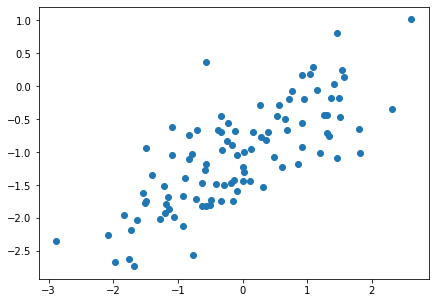

In [ ]:
plt.scatter(X_vec,y)

**e)** Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do ˆ β0 and ˆ β1 compare to β0 and
β1?

**Answer:** they are very close to each other. b0 is -0.9995 while b1 is 0.4995

In [ ]:
X=sm.add_constant(X_vec)
model_original=sm.OLS(y,X).fit()

print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.23e-20
Time:                        16:46:24   Log-Likelihood:                -71.095
No. Observations:                 100   AIC:                             146.2
Df Residuals:                      98   BIC:                             151.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0178      0.050    -20.408      0.0

**f)** Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. create an appropriate legend.

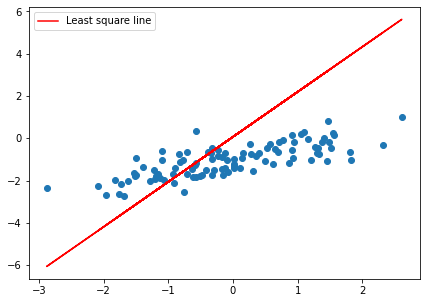

In [ ]:
pred=model.predict(X)

plt.scatter(X_vec,y)
plt.plot(X_vec,pred,color="red")
plt.legend(['Least square line'])

**g)** Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

**Note:** For this problem we are going to use sklearn. I want to avoid R's style of notation as much as possible

**Answer:** The improvemnet is minor which also shows that there really isnt a statistical significance between x^2 and y

In [ ]:
X_squared=[i**2 for i in X_vec]

df= pd.DataFrame(list(zip(X_vec, X_squared)),
               columns =['X', 'X^2'])
df


,X,X^2
0,-0.563635,0.317684
1,1.305714,1.704890
2,1.415361,2.003245
3,0.570451,0.325414
4,1.096865,1.203113
...,...,...
95,1.806103,3.262008
96,2.611019,6.817419
97,1.561291,2.437629
98,-1.090328,1.188815


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X=df[['X','X^2']].values


reg=LinearRegression()
reg.fit(X,y)
print(f"The R2 value when adding x^2 is: {reg.score(X,y)}")

The R2 value when adding x^2 is: 0.5902489008976461


**h & i)** Repeat (a)-(f) after modifying the data generation process in
such a way that there is less noise in the data. The model 
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
ǫ in (b). Describe your results.

**Answer:** with less noise the result is obviously better, but if there arent any noise in dataset ie a noise of 0, that yiels a great result but at the cost of generalization!! With higher noise the result gets worse!

In [ ]:
random.seed(10)
mi, std=0,1

X_vec=np.random.normal(mi,std,100)

In [ ]:
random.seed(10)
mi, std=0,np.sqrt(0.2)

eps=np.random.normal(mi,std,100)
y=-1+0.5*X_vec+eps


X=sm.add_constant(X_vec)
model_lessnoise=sm.OLS(y,X).fit()

print(model_lessnoise.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.47e-23
Time:                        16:46:24   Log-Likelihood:                -33.245
No. Observations:                 100   AIC:                             70.49
Df Residuals:                      98   BIC:                             75.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0385      0.035    -30.067      0.0

In [ ]:
random.seed(10)
mi, std=0,np.sqrt(0.7)

eps=np.random.normal(mi,std,100)
y=-1+0.5*X_vec+eps

X=sm.add_constant(X_vec)
model_highnoise=sm.OLS(y,X).fit()



print(model_highnoise.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     37.72
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.75e-08
Time:                        16:46:24   Log-Likelihood:                -122.53
No. Observations:                 100   AIC:                             249.1
Df Residuals:                      98   BIC:                             254.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9668      0.084    -11.463      0.0

**j)** What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [ ]:
model_original.conf_int(alpha=0.05)

array([[-1.1167974 , -0.91885518],
       [ 0.44869183,  0.62912825]])

In [ ]:
model_lessnoise.conf_int(alpha=0.05)

array([[-1.1070778 , -0.96998831],
       [ 0.38527355,  0.52109444]])

In [ ]:
model_highnoise.conf_int(alpha=0.05)

array([[-1.13422425, -0.79945636],
       [ 0.34740135,  0.67907137]])

**14.** This problem focuses on the collinearity problem.


A) Perform the following commands:

In [ ]:
random.seed(1)

x1 = np.random.uniform(size=100)
x2 = 0.5*x1+np.random.normal(size=100)/10
y = 2+2*x1 +0.3*x2+np.random.normal(size=100)

B) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

In [ ]:
from scipy.stats.stats import pearsonr

print(f"The correlation is: {pearsonr(x1,x2)}")

The correlation is: (0.8063144928036274, 4.436512234371825e-24)


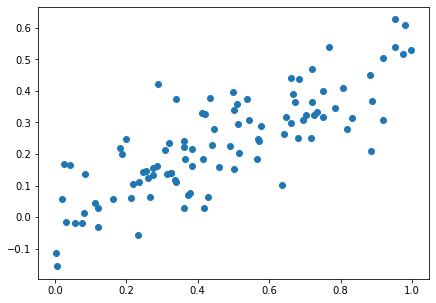

In [ ]:
plt.scatter(x1,x2)

C) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are ˆ β0, ˆ β1, and
ˆ β2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

**Answer:** B0= 1.7554, B1=2.5317 and B2=0.5284. They are close to the true coefficients. The null hypothesis can be rejected for B0 and B1, but not B2 as its p-value is greater than 5%. 

In [ ]:
df= pd.DataFrame(list(zip(x1,x2)),
               columns =['x1', 'x2'])

X=df[['x1','x2']]
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     26.85
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           5.26e-10
Time:                        16:46:24   Log-Likelihood:                -141.70
No. Observations:                 100   AIC:                             289.4
Df Residuals:                      97   BIC:                             297.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7554      0.205      8.558      0.0

D) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0? 

**Answer:** Slightly better adjusted R2. The null hypothesis can be rejected as the pvalue is close to zero

In [ ]:
X=df[['x1']]
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     53.87
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           6.32e-11
Time:                        16:54:37   Log-Likelihood:                -141.82
No. Observations:                 100   AIC:                             287.6
Df Residuals:                      98   BIC:                             292.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7595      0.204      8.618      0.0

E) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

**Answer:** As expected the result is now worse than before. This is due to the fact that x2 is less statistically significant than x1. 

In [ ]:
X=df[['x2']]
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     33.35
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           9.08e-08
Time:                        16:56:02   Log-Likelihood:                -149.08
No. Observations:                 100   AIC:                             302.2
Df Residuals:                      98   BIC:                             307.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1436      0.193     11.133      0.0

F) Do the results obtained in (c)-(e) contradict each other? Explain
your answer.

**Answer:** No they do contradict each other, but thats due to the fact that you can still get a result with **absence** of x1 which has a high statistical significans to y

This means that there is colinearity between these two variables. They show their effect in absence of each other